A practical introduction to Pandas
===================

We have been asked to *analyze an otp dataset*, without much more information. This kind of scenario is more common than you might imagine!

## 1) Quickly examine the files in ~/Data/us_dot/otp. What do they contain, in both technical and functional terms? (Use any tool you want)

In [8]:
!mv On_* data/us_dot/otp/

In [9]:
%history

!ls
!cd data
!cd data
!ls
!cd data/
!cd data/
!ls
!mkdir data/us_dot
!mkdir data/us_dot/otp
!mv On_* data/us_dot/otp/
%history


In [9]:
! pwd

/home/dsc/Clases_Master/Material_Clase/Python


In [10]:
path_to_zips = 'data/us_dot/otp/'

In [11]:
! ls {path_to_zips} 

On_Time_On_Time_Performance_2015_1.zip	On_Time_On_Time_Performance_2015_5.zip
On_Time_On_Time_Performance_2015_2.zip	On_Time_On_Time_Performance_2015_6.zip
On_Time_On_Time_Performance_2015_3.zip	On_Time_On_Time_Performance_2015_7.zip
On_Time_On_Time_Performance_2015_4.zip	On_Time_On_Time_Performance_2015_8.zip


For this example, we are going to begin using the shell from within this notebook, with the ! notation:

A ! sign before a line tells the notebook to send that line straight away to the underlying OS. 

\* Note that we can substitute python variables into the shell command. We do that by surrounding the name of the variable with curly braces ({}). That's what we are going to do with the `path_to_files` variable

### Check what the files contain

In [12]:
! unzip -l {path_to_zips}On_Time_On_Time_Performance_2015_1.zip
#Esto lo que va a hacer es leer el contenido

Archive:  data/us_dot/otp/On_Time_On_Time_Performance_2015_1.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
211633432  2015-04-16 20:02   On_Time_On_Time_Performance_2015_1.csv
    12054  2015-04-16 20:02   readme.html
---------                     -------
211645486                     2 files


Oh, it has a readme! Always good to read it.

### Unzip the readme to the current directory

Use the shell

Remember, since the zip file contains several compressed files, we need to specify which one we want.

In [13]:
! unzip -o {path_to_zips}On_Time_On_Time_Performance_2015_1.zip readme.html -d $(pwd)

Archive:  data/us_dot/otp/On_Time_On_Time_Performance_2015_1.zip
  inflating: /home/dsc/Clases_Master/Material_Clase/Python/readme.html  


In [14]:
! ls -lrt

total 162076
-rw-r--r-- 1 dsc dsc    12054 abr 16  2015 readme.html
-rw-r--r-- 1 dsc dsc     4268 nov  8  2015 914310910_T_T100_SEGMENT_ALL_CARRIER_Terms.csv
-rw-r--r-- 1 dsc dsc     4341 nov  8  2015 914310910_T_T100_SEGMENT_ALL_CARRIER_ReadMe.csv
-rw-r--r-- 1 dsc dsc 51575427 nov  8  2015 914310910_T_T100_SEGMENT_ALL_CARRIER_2015_All.csv
-rw-rw-r-- 1 dsc dsc  3983562 abr  6 12:42 introPython.pdf
-rw-r--r-- 1 dsc dsc    74848 abr  7 14:02 Clase 07.04.2018.ipynb
-rw-r--r-- 1 dsc dsc   576952 abr 13 14:42 DataScience_Python.pdf
-rw-r--r-- 1 dsc dsc        0 abr 13 14:42 data_02.zip
-rw------- 1 dsc dsc  8125159 abr 13 14:45 data_02.zip.part
-rw-r--r-- 1 dsc dsc     3262 abr 13 21:15 multas.csv
-rw-r--r-- 1 dsc dsc 11007488 abr 14 09:47 out.xls
-rw-r--r-- 1 dsc dsc  4363924 abr 14 09:48 out.xlsx
-rw-r--r-- 1 dsc dsc 45901761 abr 14 09:49 out.csv
-rw-r--r-- 1 dsc dsc 38543360 abr 14 09:50 example.db
-rw-r--r-- 1 dsc dsc     3262 abr 14 11:49 accidentes.xls
-rw-r--r-- 1 dsc dsc   502230 ab

### Take a look at the beginning of the readme file

using the shell

In [15]:
! cat readme.html 

<HTML>
<HEAD>
	<TITLE> readme.html </TITLE>
</HEAD>
<BODY>
	<TABLE><TR><TD COLSPAN=2><H4>BACKGROUND</H4></TD></TR>
	<TR><TD COLSPAN=2>The data contained in the compressed file has been extracted from the 
	On-Time Performance data table of the "On-Time" database from the TranStats data library. 
	The time period is indicated in the name of the compressed file; 
	for example, XXX_XXXXX_2001_1 contains data of the first month of the year 2001. </TD></TR>
	<TR><TD COLSPAN=2>&nbsp;</TD></TR>
	<TR><TD COLSPAN=2><H4>RECORD LAYOUT</H4></TD></TR>
	<TR><TD COLSPAN=2>Below are fields in the order that they appear on the records:</TD></TR>
	<TR><TD>Year</TD><TD>Year</TD></TR>
	<TR><TD>Quarter</TD><TD>Quarter (1-4)</TD></TR>
	<TR><TD>Month</TD><TD>Month</TD></TR>
	<TR><TD>DayofMonth</TD><TD>Day of Month</TD></TR>
	<TR><TD>DayOfWeek</TD><TD>Day of Week</TD></TR>
	<TR><TD>FlightDate</TD><TD>Flight Date (yyyymmdd)</TD></TR>
	<TR><TD>UniqueCarrier</TD><TD>Unique Carrier Code. When the same code has be

The readme file is html. Luckily, we are working in an html environment. 

### Display the contents of `readme.html` within the notebook
(Hint: check out [IPython.display.IFrame](https://ipython.org/ipython-doc/3/api/generated/IPython.display.html))

In [16]:
from IPython.display import IFrame
IFrame('readme.html', width=700, height=350)
#Esto sirve para leer archivos html

That's some very good documentation!

### Summary: 

The files within the zip are " quoted csv's. They contain information on timeliness of departures in the US, at the departure level.

In [17]:
# have a look at the beginning of one of the files to see what they look like
# esto es para echar un vistazo al archivo csv y ver la cabecera

! unzip -p {path_to_zips}On_Time_On_Time_Performance_2015_1.zip | head -n 2

"Year","Quarter","Month","DayofMonth","DayOfWeek","FlightDate","UniqueCarrier","AirlineID","Carrier","TailNum","FlightNum","OriginAirportID","OriginAirportSeqID","OriginCityMarketID","Origin","OriginCityName","OriginState","OriginStateFips","OriginStateName","OriginWac","DestAirportID","DestAirportSeqID","DestCityMarketID","Dest","DestCityName","DestState","DestStateFips","DestStateName","DestWac","CRSDepTime","DepTime","DepDelay","DepDelayMinutes","DepDel15","DepartureDelayGroups","DepTimeBlk","TaxiOut","WheelsOff","WheelsOn","TaxiIn","CRSArrTime","ArrTime","ArrDelay","ArrDelayMinutes","ArrDel15","ArrivalDelayGroups","ArrTimeBlk","Cancelled","CancellationCode","Diverted","CRSElapsedTime","ActualElapsedTime","AirTime","Flights","Distance","DistanceGroup","CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay","FirstDepTime","TotalAddGTime","LongestAddGTime","DivAirportLandings","DivReachedDest","DivActualElapsedTime","DivArrDelay","DivDistance","Div1Airport","Div1A

Pretty unreadable, so we go for a tool designed specifically for tabular data: **pandas**

### Load some of the data (one of the files) into memory as a pandas dataframe. What functions do you need to use?

Pro tip: there is no need to decompress the whole file. Check out zipfile.ZipFile

First, open a connection to one of the files

**Note:** *remember that all the files are indeed part files of the same .zip. And the Readme file is within the .zip.*

In [35]:
# import os es para acceder a comandos desde python. Es como tener los comando de shell en python

import os
import zipfile

# estamos usando listdir. Esta listando el directorio (como ls) y lo está guardando en una lista (ver print de abajo).
# es muy útil porque podemos iterar.

filenames = os.listdir(path_to_zips)

# concatenamos path_to_zips que es la ruta donde están los archivos con filenames, que es el nombre del archivo
# se recomienda trabajar así: path_gen = path_to_folder + path_of_file

# con zip_file estamos preparando nuestro archivo zip para trabajar

zip_file = zipfile.ZipFile(path_to_zips + filenames[0])

In [36]:
filenames

['On_Time_On_Time_Performance_2015_2.zip',
 'On_Time_On_Time_Performance_2015_8.zip',
 'On_Time_On_Time_Performance_2015_4.zip',
 'On_Time_On_Time_Performance_2015_3.zip',
 'On_Time_On_Time_Performance_2015_7.zip',
 'On_Time_On_Time_Performance_2015_1.zip',
 'On_Time_On_Time_Performance_2015_6.zip',
 'On_Time_On_Time_Performance_2015_5.zip']

In [37]:
sorted(list(map(lambda x: (path_to_zips + x), filenames)))

['data/us_dot/otp/On_Time_On_Time_Performance_2015_1.zip',
 'data/us_dot/otp/On_Time_On_Time_Performance_2015_2.zip',
 'data/us_dot/otp/On_Time_On_Time_Performance_2015_3.zip',
 'data/us_dot/otp/On_Time_On_Time_Performance_2015_4.zip',
 'data/us_dot/otp/On_Time_On_Time_Performance_2015_5.zip',
 'data/us_dot/otp/On_Time_On_Time_Performance_2015_6.zip',
 'data/us_dot/otp/On_Time_On_Time_Performance_2015_7.zip',
 'data/us_dot/otp/On_Time_On_Time_Performance_2015_8.zip']

zip_file is a connection to the compressed file, the .zip. We can use it to open a connection to one of the files it contains, which will behave like a normal uncompressed file that we had opened with open()

In [41]:
# Hacemos filelist. Está guardando en el csv información. El filelist te guarda en una lista. En este caso como tenemos
# solo dos archivos pues ya ponemos directamente csv y readme.
csv, readme = zip_file.filelist
print(csv)

# Con esto abrimos el csv
csv_file = zip_file.open(csv.filename)

<ZipInfo filename='On_Time_On_Time_Performance_2015_2.csv' compress_type=deflate filemode='-rw-r--r--' file_size=192791767 compress_size=21227521>


Now we're ready to load the file into memory as a pandas dataframe. Remember to close the connections to the files!

In [42]:
# We reopen the file because we have already consumed the header line.
import pandas as pd

# Con open abrimos el archivo csv
csv_file = zip_file.open(csv.filename)
df = pd.read_csv(csv_file)

# Cerramos la conexión
csv_file.close()
zip_file.close()

/home/dsc/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Let's start examining the data: show the beginning of the file. How many records does it contain?

In [43]:
df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2015,1,2,7,6,2015-02-07,AS,19930,AS,N618AS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,2,7,6,2015-02-07,AS,19930,AS,N778AS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,2,7,6,2015-02-07,AS,19930,AS,N586AS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,2,7,6,2015-02-07,AS,19930,AS,N615AS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,2,7,6,2015-02-07,AS,19930,AS,N471AS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
# Vamos a tratar de ver como es el archivo

In [45]:
df.shape

(429191, 110)

In [46]:
print(df.size)
df.size == df.shape[0] * df.shape[1]

47211010


True

In [47]:
df.dtypes

Year                    int64
Quarter                 int64
Month                   int64
DayofMonth              int64
DayOfWeek               int64
FlightDate             object
UniqueCarrier          object
AirlineID               int64
Carrier                object
TailNum                object
FlightNum               int64
OriginAirportID         int64
OriginAirportSeqID      int64
OriginCityMarketID      int64
Origin                 object
OriginCityName         object
OriginState            object
OriginStateFips         int64
OriginStateName        object
OriginWac               int64
DestAirportID           int64
DestAirportSeqID        int64
DestCityMarketID        int64
Dest                   object
DestCityName           object
DestState              object
DestStateFips           int64
DestStateName          object
DestWac                 int64
CRSDepTime              int64
                       ...   
Div2WheelsOn          float64
Div2TotalGTime        float64
Div2Longes

In [48]:
df.describe()

,Year,Quarter,Month,DayofMonth,DayOfWeek,AirlineID,FlightNum,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
count,429191.0,429191.0,429191.0,429191.000000,429191.000000,429191.000000,429191.000000,429191.000000,4.291910e+05,429191.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2015.0,1.0,2.0,14.601581,3.902675,19980.135406,2261.363365,12666.278533,1.266631e+06,31711.406646,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,0.0,0.0,8.040341,1.976684,397.065352,1795.537547,1518.082489,1.518079e+05,1282.355657,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2015.0,1.0,2.0,1.000000,1.000000,19393.000000,1.000000,10135.000000,1.013503e+06,30070.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2015.0,1.0,2.0,8.000000,2.000000,19790.000000,756.000000,11292.000000,1.129202e+06,30627.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2015.0,1.0,2.0,15.000000,4.000000,19977.000000,1731.000000,12889.000000,1.288903e+06,31453.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2015.0,1.0,2.0,22.000000,6.000000,20366.000000,3495.000000,13930.000000,1.393003e+06,32467.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2015.0,1.0,2.0,28.000000,7.000000,21171.000000,9320.000000,16218.000000,1.621801e+06,35991.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
df.count()

Year                  429191
Quarter               429191
Month                 429191
DayofMonth            429191
DayOfWeek             429191
FlightDate            429191
UniqueCarrier         429191
AirlineID             429191
Carrier               429191
TailNum               425597
FlightNum             429191
OriginAirportID       429191
OriginAirportSeqID    429191
OriginCityMarketID    429191
Origin                429191
OriginCityName        429191
OriginState           429191
OriginStateFips       429191
OriginStateName       429191
OriginWac             429191
DestAirportID         429191
DestAirportSeqID      429191
DestCityMarketID      429191
Dest                  429191
DestCityName          429191
DestState             429191
DestStateFips         429191
DestStateName         429191
DestWac               429191
CRSDepTime            429191
                       ...  
Div2WheelsOn              14
Div2TotalGTime            14
Div2LongestGTime          14
Div2WheelsOff 

In [56]:
# Como ver todos los Nan

# El count nos cuenta los elementos que no son Nan por columna. 
non_null_counts = df.count()
# df.isnull().sum()
non_null_counts

Year                  429191
Quarter               429191
Month                 429191
DayofMonth            429191
DayOfWeek             429191
FlightDate            429191
UniqueCarrier         429191
AirlineID             429191
Carrier               429191
TailNum               425597
FlightNum             429191
OriginAirportID       429191
OriginAirportSeqID    429191
OriginCityMarketID    429191
Origin                429191
OriginCityName        429191
OriginState           429191
OriginStateFips       429191
OriginStateName       429191
OriginWac             429191
DestAirportID         429191
DestAirportSeqID      429191
DestCityMarketID      429191
Dest                  429191
DestCityName          429191
DestState             429191
DestStateFips         429191
DestStateName         429191
DestWac               429191
CRSDepTime            429191
                       ...  
Div2WheelsOn              14
Div2TotalGTime            14
Div2LongestGTime          14
Div2WheelsOff 

In [58]:
# Sacar por pantalla las columnas que tengan menos de 1000 valores que no son nulos
non_null_counts[non_null_counts < 1000]

DivActualElapsedTime    706
DivArrDelay             706
Div1WheelsOff           719
Div1TailNum             719
Div2Airport              14
Div2AirportID            14
Div2AirportSeqID         14
Div2WheelsOn             14
Div2TotalGTime           14
Div2LongestGTime         14
Div2WheelsOff             1
Div2TailNum               1
Div3Airport               0
Div3AirportID             0
Div3AirportSeqID          0
Div3WheelsOn              0
Div3TotalGTime            0
Div3LongestGTime          0
Div3WheelsOff             0
Div3TailNum               0
Div4Airport               0
Div4AirportID             0
Div4AirportSeqID          0
Div4WheelsOn              0
Div4TotalGTime            0
Div4LongestGTime          0
Div4WheelsOff             0
Div4TailNum               0
Div5Airport               0
Div5AirportID             0
Div5AirportSeqID          0
Div5WheelsOn              0
Div5TotalGTime            0
Div5LongestGTime          0
Div5WheelsOff             0
Div5TailNum         

In [73]:
# Como quitar las columnas que tengan muchos Nan
# Vamos a utilizar drop

df.columns[non_null_counts < 1000] # Esta sería la condición para eliminar las columnas

df_2 = df.drop(labels = df.columns[non_null_counts < 1000], axis = 1)

## Trimming the data

The table is quite wide, and it seems that there are many columns without much data. Which, exactly, are those? (let's consider empty a column that doesn't contain at least 1000 records, arbitrarily)

In [76]:
non_null_counts = df.count()

non_null_counts[non_null_counts < 1000]

DivActualElapsedTime    706
DivArrDelay             706
Div1WheelsOff           719
Div1TailNum             719
Div2Airport              14
Div2AirportID            14
Div2AirportSeqID         14
Div2WheelsOn             14
Div2TotalGTime           14
Div2LongestGTime         14
Div2WheelsOff             1
Div2TailNum               1
Div3Airport               0
Div3AirportID             0
Div3AirportSeqID          0
Div3WheelsOn              0
Div3TotalGTime            0
Div3LongestGTime          0
Div3WheelsOff             0
Div3TailNum               0
Div4Airport               0
Div4AirportID             0
Div4AirportSeqID          0
Div4WheelsOn              0
Div4TotalGTime            0
Div4LongestGTime          0
Div4WheelsOff             0
Div4TailNum               0
Div5Airport               0
Div5AirportID             0
Div5AirportSeqID          0
Div5WheelsOn              0
Div5TotalGTime            0
Div5LongestGTime          0
Div5WheelsOff             0
Div5TailNum         

It seems that the "diverted" fields, after the first, are often empty. No big surprise, since not that many flights must be diverted more than once in a month. Let's drop those columns, since we are not that interested in those, at least for now.

In [77]:
# Dropping inplace leads to confusion. Confusion leads to fear. 
# Fear leads to anger. Anger leads to hate. Hate leads to suffering.
df2 = df.drop(df.columns[non_null_counts < 1000], axis=1)

In [78]:
df2.shape

(429191, 73)

In [79]:
# Another way to do it

df.dropna(axis=1, thresh=1000).shape == df2.shape

True

Now that we have eliminated some inconvenient data columns, let's have a look at the rest: let's loook at how the location data is encoded.


#### Exercise:

First, generate a list of the columns that have 'Origin' in their name

Second, show a sample of the values that those columns take.

Hint: we are going to use the str attribute of Series and Indexes


In [85]:
#First, generate a list of the columns that have 'Origin' in their name

#df2.columns[df2.columns.str.contains("Origin")]

origin_list = df2.columns[df2.columns.str.contains("Origin")]
origin_list

Index(['OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'Origin',
       'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName',
       'OriginWac'],
      dtype='object')

In [89]:
#Second, show a sample of the values that those columns take.
df2[origin_list].sample(5)

,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac
74307,13830,1383002,33830,OGG,"Kahului, HI",HI,15,Hawaii,2
293415,13871,1387102,33316,OMA,"Omaha, NE",NE,31,Nebraska,65
150800,14747,1474703,30559,SEA,"Seattle, WA",WA,53,Washington,93
166202,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13
122906,12953,1295302,31703,LGA,"New York, NY",NY,36,New York,22


In [ ]:
df[df.columns[df.columns.str.contains('Origin')]].sample(5)

So much redundant information!

## Fast forward

Just taking out the redundant columns would take a while, so let's jump ahead with this list of interesting columns:

In [90]:
df2 = df[['FlightDate', 'DayOfWeek', 'Carrier', 'TailNum', 'FlightNum', 'Origin', 
         'OriginCityName', 'OriginStateName', 'Dest', 'DestCityName', 'DestStateName',
         'DepTime', 'DepDelay', 'AirTime', 'Distance']]
df.sample(5)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
370554,2015,1,2,27,5,2015-02-27,UA,19977,UA,N68822,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
255536,2015,1,2,10,2,2015-02-10,WN,19393,WN,N749SW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
383735,2015,1,2,17,2,2015-02-17,UA,19977,UA,N34455,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49163,2015,1,2,21,6,2015-02-21,EV,20366,EV,N860AS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12218,2015,1,2,13,5,2015-02-13,B6,20409,B6,N273JB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Formatting columns and parsing dates and times

Hurray! we have almost cleaned our dataset. Soon we will begin to do some actual work with it. 

In [91]:
df2.dtypes

FlightDate          object
DayOfWeek            int64
Carrier             object
TailNum             object
FlightNum            int64
Origin              object
OriginCityName      object
OriginStateName     object
Dest                object
DestCityName        object
DestStateName       object
DepTime            float64
DepDelay           float64
AirTime            float64
Distance           float64
dtype: object

Pandas interpreted the Deptime column as ints and the FlighDate column as strings. We want to combine them and parse them into a DateTime column, so that we can use them properly as datetimes.

First step:

#### Exercise

Define a function that will parse our int hours into a reasonable format ("HH:MM"). It should take only one int hour and return the appropriate representation.

In [92]:
df2["DepTime"]

0          959.0
1         1717.0
2         1132.0
3         2201.0
4         1941.0
5         2331.0
6         1052.0
7         1257.0
8         1902.0
9         1646.0
10        2030.0
11         836.0
12         626.0
13         553.0
14        2332.0
15        1820.0
16         944.0
17         552.0
18        1734.0
19         754.0
20        2057.0
21         626.0
22        1658.0
23        2026.0
24        1946.0
25         634.0
26         807.0
27         847.0
28        1806.0
29        1907.0
           ...  
429161    1246.0
429162     927.0
429163    1147.0
429164    1216.0
429165       NaN
429166    1117.0
429167    1117.0
429168    1120.0
429169    1121.0
429170    1121.0
429171    1120.0
429172    1122.0
429173    1140.0
429174    1134.0
429175    1131.0
429176    1150.0
429177    1237.0
429178    1303.0
429179    1236.0
429180    1234.0
429181    1237.0
429182       NaN
429183    1254.0
429184    1313.0
429185    1248.0
429186    1244.0
429187    1348.0
429188     555

In [126]:
# We'll need to take an int and return a string of the appropriate format
import numpy as np
def deptime_to_string(num):
    #if num!=num:#If np.nan better handle this
    #    num =0.0;

    hour = int(num / 100) % 24 # There are 24s in the data, which datetime doesn't like
    minute = int(num % 100)
    

    return '%02d:%02d' % (hour, minute)

deptime_to_string(959.0)
#deptime_to_string(np.nan)

'09:59'

Now, we can use that function to build datetime strings that we will then pass to pd.to_datetime, with a format we will specify. Let's do that

Hint: Check out [pd.to_datetime's documentatoin](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) for info on the acceptable format.

#### Exercise

Overwrite the 'DepTime' column with its version in the proper format

Hint: Before overwriting your column in the dataframe, make sure that everything works by assigning the modified column to a Series variable (this takes care of not messing up with the index!).

In [123]:
# Vamos a aplicar una función a una columna. En este caso a deptime

In [129]:
#Si hacemos esto nos quitamos los Nan y podemos aplicar la función que hemos creado sin problemas
df2["DepTime"].dropna()

0          959.0
1         1717.0
2         1132.0
3         2201.0
4         1941.0
5         2331.0
6         1052.0
7         1257.0
8         1902.0
9         1646.0
10        2030.0
11         836.0
12         626.0
13         553.0
14        2332.0
15        1820.0
16         944.0
17         552.0
18        1734.0
19         754.0
20        2057.0
21         626.0
22        1658.0
23        2026.0
24        1946.0
25         634.0
26         807.0
27         847.0
28        1806.0
29        1907.0
           ...  
429159     824.0
429160    1316.0
429161    1246.0
429162     927.0
429163    1147.0
429164    1216.0
429166    1117.0
429167    1117.0
429168    1120.0
429169    1121.0
429170    1121.0
429171    1120.0
429172    1122.0
429173    1140.0
429174    1134.0
429175    1131.0
429176    1150.0
429177    1237.0
429178    1303.0
429179    1236.0
429180    1234.0
429181    1237.0
429183    1254.0
429184    1313.0
429185    1248.0
429186    1244.0
429187    1348.0
429188     555

In [131]:
# No estamos modificando la columna DepTime. Guardamos en series los valores obtenidos de la columna DepTime
# le aplicamos el dropna y luego le aplicamos la función
series = df2["DepTime"].dropna().apply(deptime_to_string)
series

In [ ]:
#La longitud de series es menor que otras columnas porque no tiene Nan

#que pasa si hacemos esto:
#df2["DepTimeStr"] = series
#si queremos guardar esta seria en una nueva columna habrá un problema. Como tiene menos filas rellena todos los datos
#y los que faltan los llena con Nan

#Pues en realidad Pandas es muy listo y evita este problema, así que se puede hacer sin problema



In [133]:
df2["DepTimeStr"] = series

/home/dsc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [134]:
df2["DepTimeStr"].head(5)

0    09:59
1    17:17
2    11:32
3    22:01
4    19:41
Name: DepTimeStr, dtype: object

In [ ]:
#series = df2['DepTime'].apply(deptime_to_string)
series = df2['DepTime'].dropna().apply(deptime_to_string)
series.head()

In [ ]:
df2['DepTimeStr'] = series

In [ ]:
# What happened to the nas? They are still nas, because our 
# Series didn't contain them. Therefore, when we put the 
# Series back into the Dataframe, those cells stayed empty.
df2['DepTimeStr'].count()

#### Exercise

Now, create a DepDateTime with the proper type using `pd.to_datetime`

In [135]:
# This is the format pd.to_datetime needs:

ts = pd.to_datetime('2015-01-15 08:30')
ts

Timestamp('2015-01-15 08:30:00')

In [137]:
df2["FlightDate"].head(5)

0    2015-02-07
1    2015-02-07
2    2015-02-07
3    2015-02-07
4    2015-02-07
Name: FlightDate, dtype: object

In [138]:
df2["DepTimeStr"].head(5)

0    09:59
1    17:17
2    11:32
3    22:01
4    19:41
Name: DepTimeStr, dtype: object

In [142]:
#Hay que ponerle el espacio en la concatenación porque así funciona el pd.to_datetime
departure_datetimes = pd.to_datetime(df2['FlightDate'] + ' ' + df2['DepTimeStr'])
departure_datetimes.head(5)
#Nos ha devuelto una serie

#Y ahora lo guardamos en una nueva columna
df2["DepDateTime"] = departure_datetimes
df2.head(5)

/home/dsc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,FlightDate,DayOfWeek,Carrier,TailNum,FlightNum,Origin,OriginCityName,OriginStateName,Dest,DestCityName,DestStateName,DepTime,DepDelay,AirTime,Distance,DepTimeStr,DepDateTime
0,2015-02-07,6,AS,N618AS,131,PDX,"Portland, OR",Oregon,ANC,"Anchorage, AK",Alaska,959.0,19.0,195.0,1542.0,09:59,2015-02-07 09:59:00
1,2015-02-07,6,AS,N778AS,132,FAI,"Fairbanks, AK",Alaska,SEA,"Seattle, WA",Washington,1717.0,-13.0,197.0,1533.0,17:17,2015-02-07 17:17:00
2,2015-02-07,6,AS,N586AS,140,ANC,"Anchorage, AK",Alaska,PDX,"Portland, OR",Oregon,1132.0,-8.0,192.0,1542.0,11:32,2015-02-07 11:32:00
3,2015-02-07,6,AS,N615AS,143,PDX,"Portland, OR",Oregon,ANC,"Anchorage, AK",Alaska,2201.0,-9.0,193.0,1542.0,22:01,2015-02-07 22:01:00
4,2015-02-07,6,AS,N471AS,149,LAX,"Los Angeles, CA",California,ANC,"Anchorage, AK",Alaska,1941.0,1.0,289.0,2345.0,19:41,2015-02-07 19:41:00


In [148]:
#Tenemos tres columnas que prácticamente dicen lo mismo que la columna que acabamos de crear
#Nos cargamos estas tres columnas
df2 = df2.drop(["FlightDate", "DepTime", "DepTimeStr"], axis = 1)
#Sale error porque he ejecutado otra vez esto y ya lo había eliminado

ValueError: labels ['FlightDate' 'DepTime' 'DepTimeStr'] not contained in axis

In [157]:
df2.sample(5)

,DayOfWeek,Carrier,TailNum,FlightNum,Origin,OriginCityName,OriginStateName,Dest,DestCityName,DestStateName,DepDelay,AirTime,Distance,DepDateTime
128549,1,AA,N586AA,1505,PSP,"Palm Springs, CA",California,DFW,"Dallas/Fort Worth, TX",Texas,8.0,137.0,1126.0,2015-02-02 14:02:00
75939,2,MQ,N650MQ,2929,ORD,"Chicago, IL",Illinois,RST,"Rochester, MN",Minnesota,NaN,NaN,268.0,NaT
217579,7,US,N822AW,1904,CLT,"Charlotte, NC",North Carolina,PIT,"Pittsburgh, PA",Pennsylvania,2.0,57.0,366.0,2015-02-22 08:12:00
131765,2,AA,N4XNAA,1569,DFW,"Dallas/Fort Worth, TX",Texas,MFE,"Mission/McAllen/Edinburg, TX",Texas,-3.0,68.0,469.0,2015-02-10 17:57:00
68876,6,F9,N204FR,1067,ORD,"Chicago, IL",Illinois,DEN,"Denver, CO",Colorado,31.0,136.0,888.0,2015-02-14 14:26:00


In [ ]:
departure_datetimes = pd.to_datetime(df2['FlightDate'] + ' ' + df2['DepTimeStr'])
df2['DepDateTime'] = departure_datetimes

# Drop the now-redundant columns
df2 = df2.drop(['FlightDate', 'DepTime', 'DepTimeStr'], axis=1)

In [ ]:
df2.sample(5)

### Inspect the types, see if everything is in order

In [158]:
df2.dtypes

DayOfWeek                   int64
Carrier                    object
TailNum                    object
FlightNum                   int64
Origin                     object
OriginCityName             object
OriginStateName            object
Dest                       object
DestCityName               object
DestStateName              object
DepDelay                  float64
AirTime                   float64
Distance                  float64
DepDateTime        datetime64[ns]
dtype: object

## Examining the data

Finally clean! Let's start to do some preliminary work on the data.

#### Exercise:

Find the biggest delays. 

How would you find the 5 maximum delays?

In [163]:
df2["DepDelay"].head()

0    19.0
1   -13.0
2    -8.0
3    -9.0
4     1.0
Name: DepDelay, dtype: float64

In [169]:
df2.sort_values?

In [171]:
df2.sort_values(by = "DepDelay", ascending = False).head(5)

,DayOfWeek,Carrier,TailNum,FlightNum,Origin,OriginCityName,OriginStateName,Dest,DestCityName,DestStateName,DepDelay,AirTime,Distance,DepDateTime
126203,6,AA,N028AA,1312,STL,"St. Louis, MO",Missouri,MIA,"Miami, FL",Florida,1587.0,131.0,1068.0,2015-02-28 08:47:00
117050,7,AA,N007AA,1080,EGE,"Eagle, CO",Colorado,ORD,"Chicago, IL",Illinois,1457.0,123.0,1007.0,2015-02-22 14:32:00
73864,7,HA,N374HA,50,HNL,"Honolulu, HI",Hawaii,JFK,"New York, NY",New York,1433.0,498.0,4983.0,2015-02-08 16:23:00
73885,1,HA,N374HA,51,JFK,"New York, NY",New York,HNL,"Honolulu, HI",Hawaii,1429.0,684.0,4983.0,2015-02-09 09:24:00
131625,4,AA,N3ASAA,1564,PHX,"Phoenix, AZ",Arizona,ORD,"Chicago, IL",Illinois,1367.0,167.0,1440.0,2015-02-19 05:54:00


In [ ]:
df2.sort_values(by='DepDelay', ascending=False).head()

#### Exercise

What was the average delay for this month? Standard deviation and typical value?

In [173]:
#Con esto vemos la media, máximo, mínimo...
df2["DepDelay"].describe()

count    409132.000000
mean         11.885284
std          40.143735
min         -61.000000
25%          -4.000000
50%          -1.000000
75%          11.000000
max        1587.000000
Name: DepDelay, dtype: float64

In [174]:
#Si queremos ver la correlación entre varias variables
#Relación de DepDelay con aeropuerto de origen
df2.corr()

,DayOfWeek,FlightNum,DepDelay,AirTime,Distance
DayOfWeek,1.000000,0.015379,-0.018116,0.015865,0.021141
FlightNum,0.015379,1.000000,0.002797,-0.333575,-0.349537
DepDelay,-0.018116,0.002797,1.000000,0.021388,0.020472
AirTime,0.015865,-0.333575,0.021388,1.000000,0.977982
Distance,0.021141,-0.349537,0.020472,0.977982,1.000000


In [ ]:
df2['DepDelay'].describe()

Also: a quick look at the correlation between the numerical variables is extremely easy with pandas:

In [ ]:
df2.corr()

#### Exercise

What is the origin that has the highest average delay? We'll first group by origin (the *license plate* of a plane) and then calculate the relevant statistic for each group (group of *departures*)

In [175]:
#Primero vamos a agrupar por Origin
df2.dtypes

DayOfWeek                   int64
Carrier                    object
TailNum                    object
FlightNum                   int64
Origin                     object
OriginCityName             object
OriginStateName            object
Dest                       object
DestCityName               object
DestStateName              object
DepDelay                  float64
AirTime                   float64
Distance                  float64
DepDateTime        datetime64[ns]
dtype: object

In [178]:
grouped_by_origin = df2.groupby("Origin")
grouped_by_origin

In [179]:
#Calculamos la media según el origen
grouped_by_origin["DepDelay"].mean()

Origin
ABE    16.677632
ABI     5.222826
ABQ     9.294551
ABR    16.267857
ABY     9.630137
ACT    11.648649
ACV    14.368000
ACY     5.065789
ADK     5.000000
ADQ    -6.458333
AEX     8.004149
AGS    11.431034
ALB     9.821497
ALO    20.955556
AMA     7.650831
ANC     2.168972
APN    14.093023
ASE    15.752747
ATL     9.936441
ATW    10.160000
AUS     9.395777
AVL    17.442529
AVP    16.452381
AZO    17.744186
BDL    12.153214
BET     4.360000
BFL     6.480392
BGM    17.361111
BGR    23.421053
BHM     9.812377
         ...    
SPS    17.068182
SRQ    15.839117
STC    19.130435
STL    10.599654
STT    15.885167
STX    14.777778
SUN     1.725000
SUX    26.772727
SWF    26.060606
SYR    14.757106
TLH    12.156028
TOL    15.373134
TPA    10.728542
TRI     6.811189
TTN    49.747423
TUL     7.436632
TUS     5.819133
TVC    18.840909
TWF    -7.320755
TXK     1.984127
TYR     6.088608
TYS    17.085417
UST    39.000000
VEL     2.333333
VLD     7.240000
VPS    11.883436
WRG    -5.259259
XNA    

In [188]:
#Sacamos los máximos
grouped_by_origin["DepDelay"].mean().sort_values(ascending = False).head(10)

Origin
TTN    49.747423
ILG    40.789474
UST    39.000000
SMX    32.327273
JLN    31.120000
PLN    30.500000
MKG    27.500000
SCE    26.888889
SUX    26.772727
OTH    26.071429
Name: DepDelay, dtype: float64

In [193]:
#Ahora vamos a agregar a la columna el valor count. Queremos que salga mean y count y ordenar por el mean
grouped_by_origin["DepDelay"].agg(["mean", "count"]).sort_values(by = "mean", ascending = False).head(10)

,mean,count
Origin,,
TTN,49.747423,194
ILG,40.789474,19
UST,39.000000,11
SMX,32.327273,55
JLN,31.120000,50
PLN,30.500000,46
MKG,27.500000,46
SCE,26.888889,54
SUX,26.772727,44


In [195]:
#grouped_by_plane = df2.groupby('TailNum')
grouped_by_plane = df2.groupby('Origin')
type(grouped_by_plane)

pandas.core.groupby.DataFrameGroupBy

In [196]:
grouped_by_plane['DepDelay'].mean().sort_values(ascending=False).head(10)

Origin
TTN    49.747423
ILG    40.789474
UST    39.000000
SMX    32.327273
JLN    31.120000
PLN    30.500000
MKG    27.500000
SCE    26.888889
SUX    26.772727
OTH    26.071429
Name: DepDelay, dtype: float64

But the mean can be only meaningful if we had enough samples. Lets check that! We can aggregate *mean* and *count* at the same time.

In [197]:
#delays_by_plane = grouped_by_plane['DepDelay'].agg(['mean', 'count'])
delays_by_origin = grouped_by_plane['DepDelay'].agg(['mean', 'count'])

In [198]:
#delays_by_plane.sort_values('mean', ascending=False)
delays_by_origin.sort_values('mean', ascending=False)

,mean,count
Origin,,
TTN,49.747423,194
ILG,40.789474,19
UST,39.000000,11
SMX,32.327273,55
JLN,31.120000,50
PLN,30.500000,46
MKG,27.500000,46
SCE,26.888889,54
SUX,26.772727,44


Awesome! now, let's look at the average delay of the planes with some departures (let's say, at least 15)

In [199]:
consistently_delayed = delays_by_origin[delays_by_origin['count'] > 14]
highly_delayed = consistently_delayed.sort_values('mean', ascending=False).head(100)

# What companies run the rank 5/10 most delayed?
df2.join(highly_delayed.head(5), on='Origin', how='inner')['Carrier'].unique()

array(['F9', 'MQ', 'OO'], dtype=object)

#### Exercise: 

Show cities by descending number of airports

In [200]:
df2.dtypes

DayOfWeek                   int64
Carrier                    object
TailNum                    object
FlightNum                   int64
Origin                     object
OriginCityName             object
OriginStateName            object
Dest                       object
DestCityName               object
DestStateName              object
DepDelay                  float64
AirTime                   float64
Distance                  float64
DepDateTime        datetime64[ns]
dtype: object

In [214]:
#Agrupamos por la columna origincityname y sacamos la variable origin
grouped_by_city_origin = df2.groupby("OriginCityName")

#Al aplicar el unique tenemos una lista que por ciudad nos saca los aeropuertos que tiene
airports_by_city = grouped_by_city_origin["Origin"].unique()
airports_by_city

OriginCityName
Aberdeen, SD                           [ABR]
Abilene, TX                            [ABI]
Adak Island, AK                        [ADK]
Aguadilla, PR                          [BQN]
Akron, OH                              [CAK]
Albany, GA                             [ABY]
Albany, NY                             [ALB]
Albuquerque, NM                        [ABQ]
Alexandria, LA                         [AEX]
Allentown/Bethlehem/Easton, PA         [ABE]
Alpena, MI                             [APN]
Amarillo, TX                           [AMA]
Anchorage, AK                          [ANC]
Appleton, WI                           [ATW]
Arcata/Eureka, CA                      [ACV]
Asheville, NC                          [AVL]
Aspen, CO                              [ASE]
Atlanta, GA                            [ATL]
Atlantic City, NJ                      [ACY]
Augusta, GA                            [AGS]
Austin, TX                             [AUS]
Bakersfield, CA                        [

In [218]:
#Si queremos saber que ciudades tienen mayor número de aeropuertos
airports_by_city.map(lambda x: len(x)).sort_values(ascending = False).head()

OriginCityName
Chicago, IL       2
Houston, TX       2
New York, NY      2
Washington, DC    2
Fargo, ND         1
Name: Origin, dtype: int64

In [225]:
grouped_by_city_origin["Origin"].unique().str.len().sort_values(ascending = False).head()

OriginCityName
Chicago, IL       2
Houston, TX       2
New York, NY      2
Washington, DC    2
Fargo, ND         1
Name: Origin, dtype: int64

In [ ]:
airports_by_city = df2.groupby('OriginCityName')['Origin'].unique()
#We have a list of Airport code for each city now.
airports_by_city.map(lambda x: len(x)).sort_values(ascending=False).head()

## Plotting

There are several ways in which we could go about plotting this dataset in order to get acquainted with it. 

For example, do the delays have a relationship with the number of departures a plane does?

#### Exercise

Do a scatter plot with matplotlib. Check the documentation

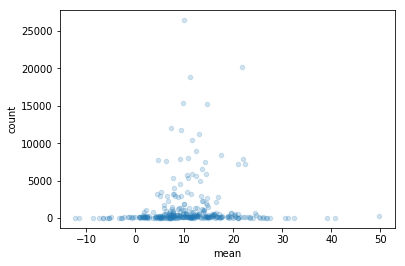

In [227]:
import matplotlib.pyplot as plt 
%matplotlib inline

ax = delays_by_origin.plot.scatter('mean', 'count', alpha=.2)
#ax.set_xlim(-20,240)
#ax.set_ylim(-10,240)

#### Exercise:

Plot the distribution of delays as a histogram, both with a linear and a logarithmic scale

Text(0.5,1,'Number of flights per delay bin')

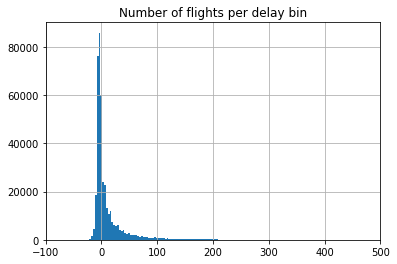

In [228]:
# Little trick: Just by importing seaborn, it will change 
# matplotlib defaults and make your graphs much prettier.!!

import seaborn as sns

ax = df['DepDelay'].hist(bins=500)
ax.set_xlim(-100, 500)

plt.title('Number of flights per delay bin')

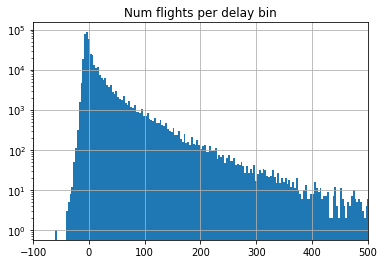

In [229]:
# We can make any axis logarithmic in order to see better a very unequal distribution

ax = df['DepDelay'].hist(bins=500)
ax.set_xlim(-100, 500)
plt.title('Num flights per delay bin')

plt.yscale('log')


### Another question:

how do the delays stack over the course of the day? We are going to look at it by plotting the distribution of delays for each hour of the day. The very best way to compare distributions side by side is a boxplot, so we'll use that.

In [ ]:
help(plt.boxplot)

We need to provide `plt.boxplot()` with a sequence that contains 24 elements. Each of those will be a sequence containing every individual delay for one hour of the day. We'll need, therefore, to extract hours of the day for each departure and group based on that.

In [230]:
# Now, we can iterate over the groups and extract the delays. 
# We keep them in two different vectors because that is what boxplot wants

df2['DepHour'] =  df2['DepDateTime'].map(lambda x: x.hour)

by_hour = df2.groupby('DepHour')

hours = []
groups = []

for h, g in by_hour:
    hours.append("%02d" % h)
    groups.append(g['DepDelay'])

In [231]:
# We have create a groupby object. That object behaves like a list.
# Each element of that list is a (key, dataframe) tuple.
# You can think of the key as the group's name. The dataframe
# contains all the rows in the original dataframe that correspond 
# to that key: Here, group '0.0' contains all rows from flights 
# that departed on hour 0.

print(type(by_hour))
print(list(by_hour))
print(list(by_hour)[0], list(by_hour)[0][1].shape)

<class 'pandas.core.groupby.DataFrameGroupBy'>
[(0.0,         DayOfWeek Carrier TailNum  FlightNum Origin      OriginCityName  \
271             6      AS  N590AS        816    LIH           Lihue, HI   
399             7      AS  N769AS         98    ANC       Anchorage, AK   
405             7      AS  N471AS        108    ANC       Anchorage, AK   
412             7      AS  N556AS        122    ANC       Anchorage, AK   
960             4      DL  N383DN        765    LAX     Los Angeles, CA   
991             4      DL  N127DL        806    SFO   San Francisco, CA   
1065            4      DL  N589NW        892    LAX     Los Angeles, CA   
1119            4      DL  N339NB        993    ATL         Atlanta, GA   
1482            5      DL  N345NW        922    DEN          Denver, CO   
1589            5      DL  N144DA       1099    SFO   San Francisco, CA   
1793            5      DL  N690DL       1264    SLC  Salt Lake City, UT   
2161            5      DL  N3741S       1560  

(0.0,         DayOfWeek Carrier TailNum  FlightNum Origin      OriginCityName  \
271             6      AS  N590AS        816    LIH           Lihue, HI   
399             7      AS  N769AS         98    ANC       Anchorage, AK   
405             7      AS  N471AS        108    ANC       Anchorage, AK   
412             7      AS  N556AS        122    ANC       Anchorage, AK   
960             4      DL  N383DN        765    LAX     Los Angeles, CA   
991             4      DL  N127DL        806    SFO   San Francisco, CA   
1065            4      DL  N589NW        892    LAX     Los Angeles, CA   
1119            4      DL  N339NB        993    ATL         Atlanta, GA   
1482            5      DL  N345NW        922    DEN          Denver, CO   
1589            5      DL  N144DA       1099    SFO   San Francisco, CA   
1793            5      DL  N690DL       1264    SLC  Salt Lake City, UT   
2161            5      DL  N3741S       1560    ANC       Anchorage, AK   
2369            5  

### Everything looks ok! let's plot this thing!

/home/dsc/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


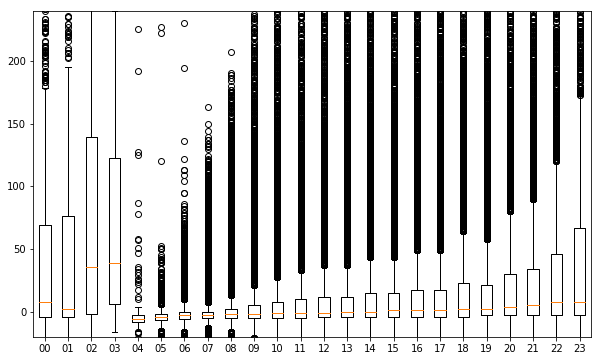

In [232]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_ylim(-20, 240)

bp = plt.boxplot(groups)

labels = plt.setp(ax1, xticklabels=hours)